# User loan Prediction

#### In this project we will try to provide an empirical comparison of the most used machine learning approaches in the loan prediction area. 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/raghad/Documents/bootcamp/project/datae.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###  Point summary of numerical attributes

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Basic EDA

1. Detect missing values using isnull() function  

In [5]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


2. fill all null values or missing values in the DataFrame

In [6]:
df=df.fillna(method ='pad')

3. Remove duplicate rows in the DataFrame

In [7]:
df.drop_duplicates(keep=False,inplace=True)

### Plot how many family members for borrower

<AxesSubplot:ylabel='Frequency'>

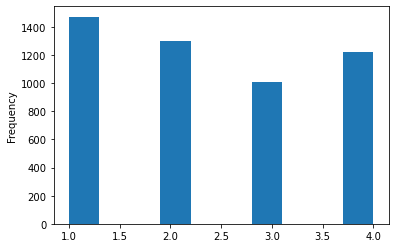

In [8]:
df["Family"].plot(kind = 'hist')

- We can see that the size of the family of customers consisting of 1 and 2 


### Scatter plot for Age and Income columns

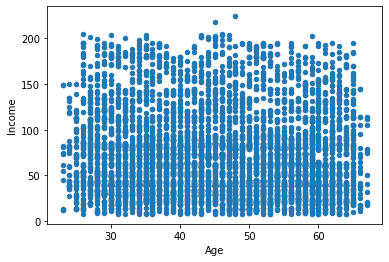

In [9]:
import matplotlib.pyplot as plt

df.plot(kind = 'scatter', x = 'Age', y = 'Income')
plt.show() 

- We note that the ages of customers between 40 and 50 have higher incomes


### Scatter plot for Education and Income Features

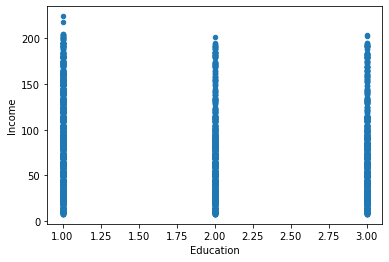

In [10]:
df.plot(kind = 'scatter', x = 'Education', y = 'Income')
plt.show() 

- Here the customers whose education level is 1 is having more income than the others
- #### Education : Education Level. 
1. Undergrad
2. Graduate
3. Advanced/Professional

### Plot Educations for borrower

<AxesSubplot:ylabel='Frequency'>

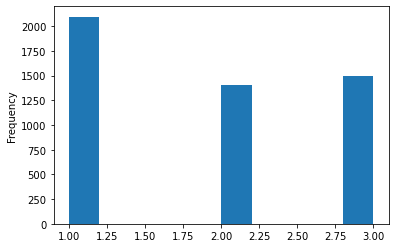

In [11]:
df["Education"].plot(kind = 'hist')

- We notice an increase in the number of customers whose education level is 1

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

### Line plot for Age and Income features

<AxesSubplot:xlabel='Age', ylabel='Income'>

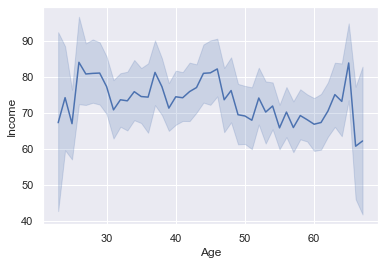

In [13]:
sns.lineplot(data=df, x="Age", y="Income")

- We note that the ages of customers between 30 and 50 have higher incomes
- We also note that between the ages of 50 and 60, and before the age of 25, they have less income

### Relplot for for Age, Income and Family size Features

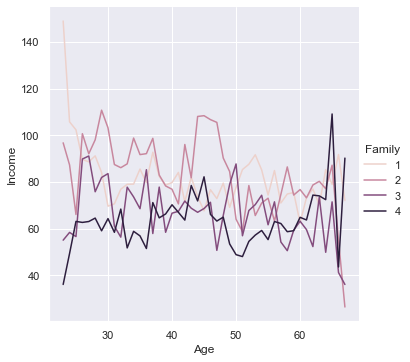

In [14]:
sns.relplot(data=df, x="Age", y="Income", hue="Family",ci=None, kind="line")

- We note that the smallest family size and the youngest age have the higher income more than 100K

### Pie Chart of loan takers

We divided the dataFrame to loan_takers and loan_no_takers through the Personal Loans column

In [15]:
loan_takers=len(df.loc[df['Personal Loan'] == 1])
loan_no_takers=len(df.loc[df['Personal Loan'] == 0])
y = np.array([loan_no_takers, loan_takers])

([<matplotlib.patches.Wedge at 0x7fa0c827b8b0>,
 [Text(-0.3267457916587642, -1.050350983068654, 'Take loan'),
  Text(0.32674584082924174, 1.0503509677725784, 'Did not take')])

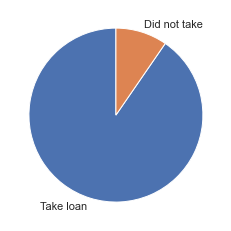

In [16]:
plt.pie(y, labels = ['Take loan','Did not take'], startangle = 90)

- We can see the customers who has taken the Personal Loan have good rate of 90% 

- Choose target and training data

In [17]:
y=df['Personal Loan']
x=df.drop(['Personal Loan','ID'], axis=1)

- Split data for traning and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

### 1. LinearRegression

#### Build Linear regression model

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

#### Return the coefficient of determination of the prediction.

In [20]:
reg.score(X_train, y_train)

0.37324447543716877

#### Independent term in the linear model.

In [21]:
reg.intercept_

-0.18759745742527645

#### Estimated coefficients for the linear regression problem. 

In [22]:
reg.coef_

array([-6.33348802e-03,  6.89761031e-03,  2.96010548e-03, -2.64976168e-07,
        3.32615120e-02,  1.05921544e-02,  7.81878046e-02,  8.96937624e-05,
       -6.27847879e-02,  3.17339060e-01, -2.51946380e-02, -4.87217733e-02])

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(reg, X_train, y_train, cv=3,
                        return_train_score=True)

In [24]:
print(scores)

{'fit_time': array([0.00974011, 0.0034101 , 0.00439692]), 'score_time': array([0.00338888, 0.00144005, 0.00125504]), 'test_score': array([0.38856534, 0.34973302, 0.35527026]), 'train_score': array([0.36191831, 0.38423126, 0.3778638 ])}


# Applying classification models ( K-NN, Naïve Bayes and K-means)

### 1. KNN 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
y_pred=neigh.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
Knn_accuracy=accuracy_score(y_test, y_pred)
print(Knn_accuracy)

0.8928


In [28]:
from sklearn.metrics import classification_report
target_names = ['Loan', 'No loan']
print(classification_report(y_pred, y_test, target_names=target_names))

              precision    recall  f1-score   support

        Loan       0.98      0.91      0.94      1208
     No loan       0.16      0.50      0.24        42

    accuracy                           0.89      1250
   macro avg       0.57      0.70      0.59      1250
weighted avg       0.95      0.89      0.92      1250



### 2. Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [31]:
naive_accuracy=accuracy_score(y_test, y_pred)
print(naive_accuracy)

0.8976


In [32]:
print(classification_report(y_pred, y_test, target_names=target_names))

              precision    recall  f1-score   support

        Loan       0.93      0.95      0.94      1090
     No loan       0.62      0.52      0.56       160

    accuracy                           0.90      1250
   macro avg       0.78      0.74      0.75      1250
weighted avg       0.89      0.90      0.89      1250



### 3. k-means

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [34]:
len(kmeans.labels_)

3750

In [35]:
y_pred = kmeans.predict(X_test)

In [36]:
kmean_accuracy=accuracy_score(y_test, y_pred)
print(kmean_accuracy)

0.524


In [37]:
print(classification_report(y_pred, y_test, target_names=target_names))

              precision    recall  f1-score   support

        Loan       0.53      0.89      0.67       667
     No loan       0.46      0.10      0.17       583

    accuracy                           0.52      1250
   macro avg       0.49      0.50      0.42      1250
weighted avg       0.50      0.52      0.43      1250



### clusters of kemeans

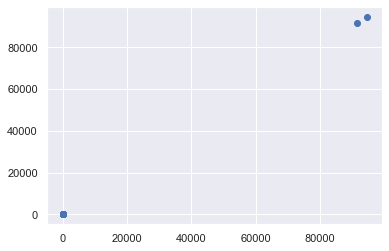

In [38]:
plt.scatter(np.array(kmeans.cluster_centers_), np.array(kmeans.cluster_centers_))

# compare models

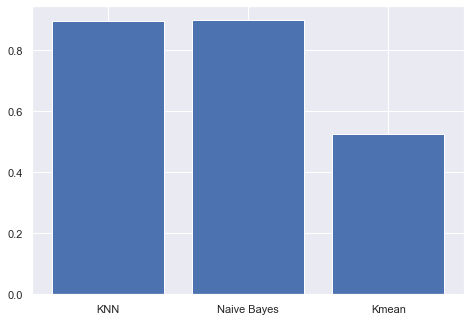

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['KNN', 'Naive Bayes', 'Kmean']
students = [Knn_accuracy,naive_accuracy,kmean_accuracy]



ax.bar(langs,students)
plt.show()